In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
data = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')

In [4]:
# Display first few rows
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             5

In [5]:
# Step 1: Clean & inspect data
print("\nColumn Info:")
print(data.info())


Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-nu

In [7]:
# Drop rows with missing Order Date or Product
data.dropna(subset=['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERDATE', 'CITY'], inplace=True)

In [8]:
# Step 2: Feature Engineering
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')
data['Sales'] = data['QUANTITYORDERED'] * data['PRICEEACH']
data['Month'] = data['ORDERDATE'].dt.month
data['Year'] = data['ORDERDATE'].dt.year

In [9]:
# Step 3: Monthly Sales Trend
monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

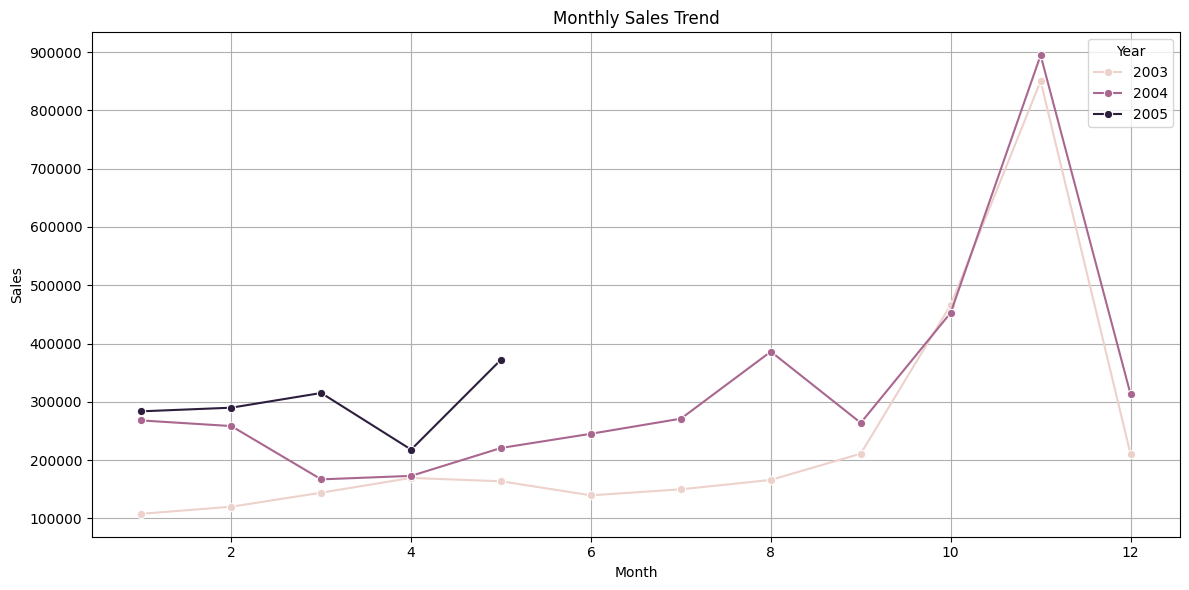

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


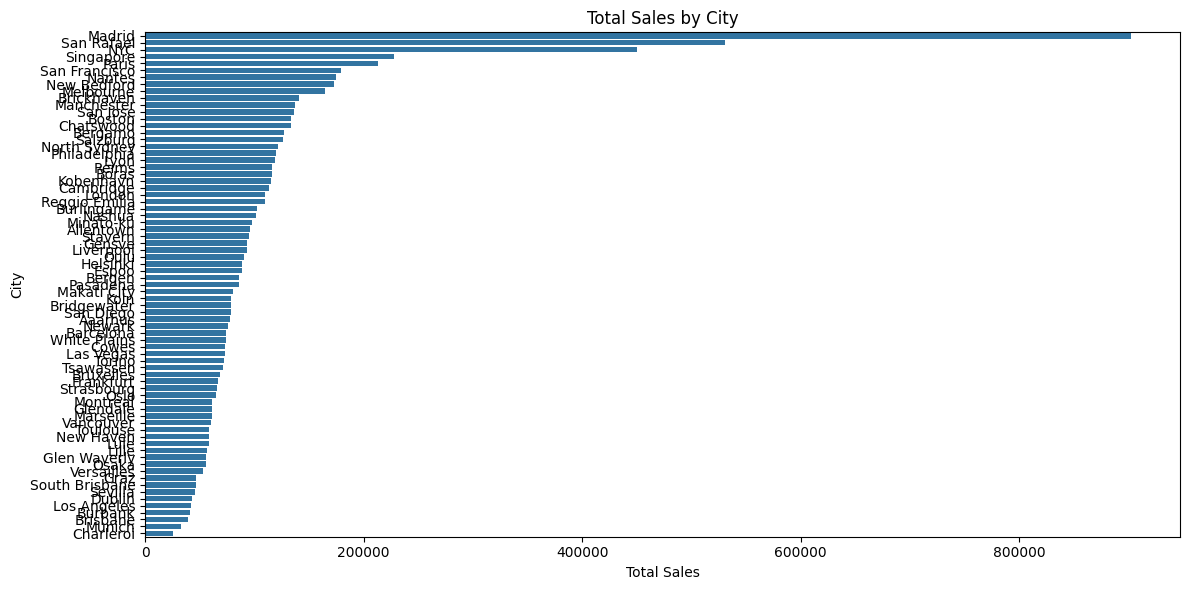

In [11]:
# Step 4: Sales by City
city_sales = data.groupby('CITY')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.values, y=city_sales.index)
plt.title('Total Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [12]:
# Step 5: Top Products by Quantity Ordered
top_products = data.groupby('PRODUCTCODE')['QUANTITYORDERED'].sum().sort_values(ascending=False).head(10)

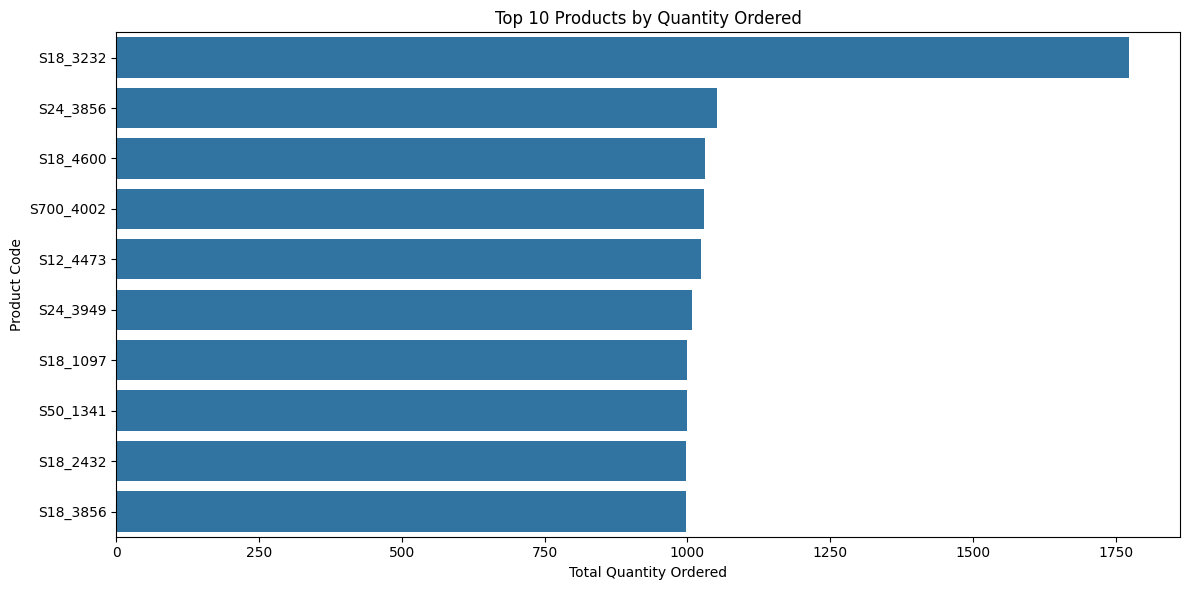

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Quantity Ordered')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Code')
plt.tight_layout()
plt.show()


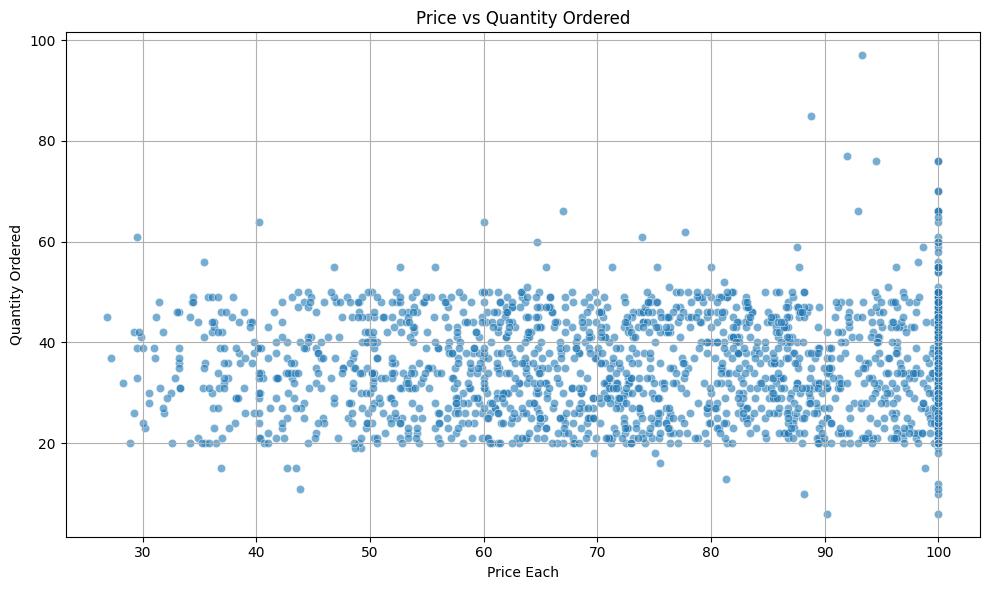

In [14]:
# Step 6: Price vs Quantity Ordered (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICEEACH', y='QUANTITYORDERED', data=data, alpha=0.6)
plt.title('Price vs Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.tight_layout()
plt.show()